In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Real_fake_news (1) (1).csv')

In [3]:
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
2268,2268,2268,Louis Jacobson,Pregnant women trying to buy health insurance ...,J. James Rohack,True,REAL,1
4548,2114,2114,Ciara O'Rourke,"""Donald Trump has been in public eye for over ...",Viral image,False,FAKE,0
2367,2367,2367,Bill Adair,"""A year ago, in March 2007, I called for immed...",Hillary Clinton,True,REAL,1
1928,1928,1928,• February,"""Texas added more jobs in 2010 than any other ...",Rick Perry,True,REAL,1
1790,1790,1790,Louis Jacobson,"""Young veterans have a higher unemployment rat...",Barack Obama,True,REAL,1


In [4]:
df.shape

(4870, 8)


## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [7]:
df.sample(5)

,author,statement,source,target,BinaryTarget,BinaryNumTarget
1490,Nancy Madsen,"""In Galveston, Texas, they have allowed people...",E.W. Jackson,True,REAL,1
357,Louis Jacobson,"""The impending work stoppage is unlawful.""",Patrick Morrisey,True,REAL,1
1211,Eric Stirgus,The proposed raises for the Norcross City Coun...,Norcross City Council,True,REAL,1
532,Miriam Valverde,"""In Chicago, they've had thousands of shooting...",Donald Trump,True,REAL,1
4042,Shefali Luthra,"“We were slow with the testing, but very quick...",Jesse Watters,False,FAKE,0


In [8]:
df.isnull().sum()

author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

2

In [10]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(4868, 6)

## 2.EDA

In [13]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [14]:
df['BinaryNumTarget'].value_counts()

1    2434
0    2434
Name: BinaryNumTarget, dtype: int64

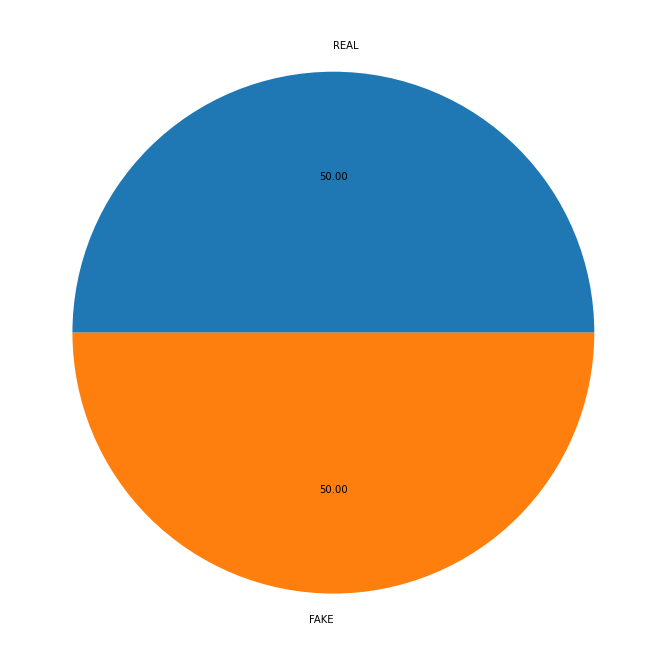

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.pie(df['BinaryNumTarget'].value_counts(), labels=['REAL','FAKE'],autopct="%0.2f")
plt.show()

In [16]:
# Data is imbalanced
import nltk
!pip install nltk
nltk.download('punkt')

You should consider upgrading via the 'C:\Users\saura\anaconda3\python.exe -m pip install --upgrade pip' command.
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [17]:
df['num_characters'] = df['statement'].apply(len)

In [18]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget,num_characters
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1,85
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1,56
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1,55
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1,221
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1,126


In [19]:
# num of words
df['num_words'] = df['statement'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget,num_characters,num_words
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1,85,17
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1,56,12
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1,55,13
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1,221,35
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1,126,27


In [20]:
df['num_sentences'] = df['statement'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget,num_characters,num_words,num_sentences
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1,85,17,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1,56,12,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1,55,13,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1,221,35,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1,126,27,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4868.000000,4868.000000,4868.000000
mean,104.717338,21.669269,1.168858
std,44.750467,9.100172,0.504998
min,20.000000,5.000000,1.000000
25%,73.000000,15.000000,1.000000
50%,96.000000,20.000000,1.000000
75%,127.000000,26.000000,1.000000
max,446.000000,87.000000,8.000000


In [22]:
# Real
df[df['BinaryNumTarget'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2434.000000,2434.000000,2434.000000
mean,107.937551,22.281841,1.149137
std,42.921106,8.459926,0.465348
min,20.000000,5.000000,1.000000
25%,76.000000,16.000000,1.000000
50%,100.000000,21.000000,1.000000
75%,131.000000,27.000000,1.000000
max,295.000000,66.000000,5.000000


In [23]:
# Fake
df[df['BinaryNumTarget'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2434.000000,2434.000000,2434.000000
mean,101.497124,21.056697,1.188578
std,46.293220,9.661219,0.541133
min,24.000000,5.000000,1.000000
25%,70.000000,14.000000,1.000000
50%,91.500000,19.000000,1.000000
75%,123.000000,25.000000,1.000000
max,446.000000,87.000000,8.000000


In [24]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

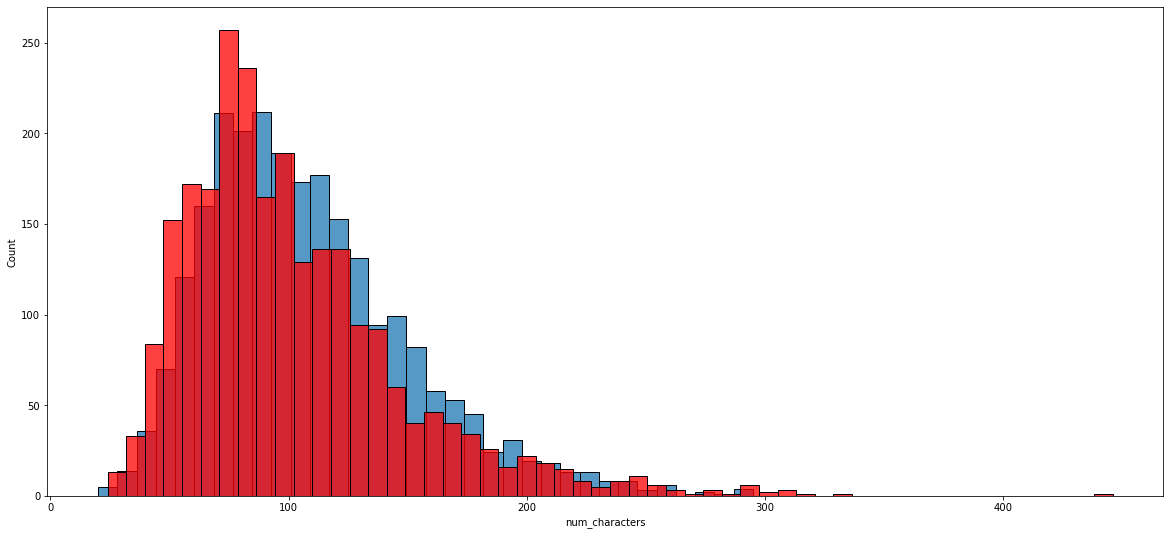

In [25]:
plt.figure(figsize=(20,9))
sns.histplot(df[df['BinaryNumTarget'] == 1]['num_characters'])
sns.histplot(df[df['BinaryNumTarget'] == 0]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

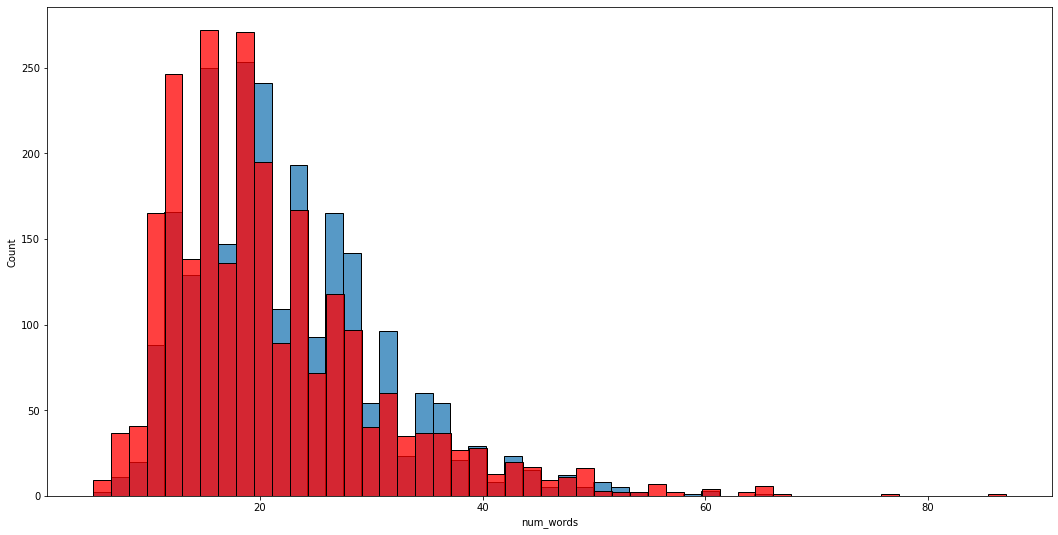

In [26]:
plt.figure(figsize=(18,9))
sns.histplot(df[df['BinaryNumTarget'] == 1]['num_words'])
sns.histplot(df[df['BinaryNumTarget'] == 0]['num_words'],color='red')

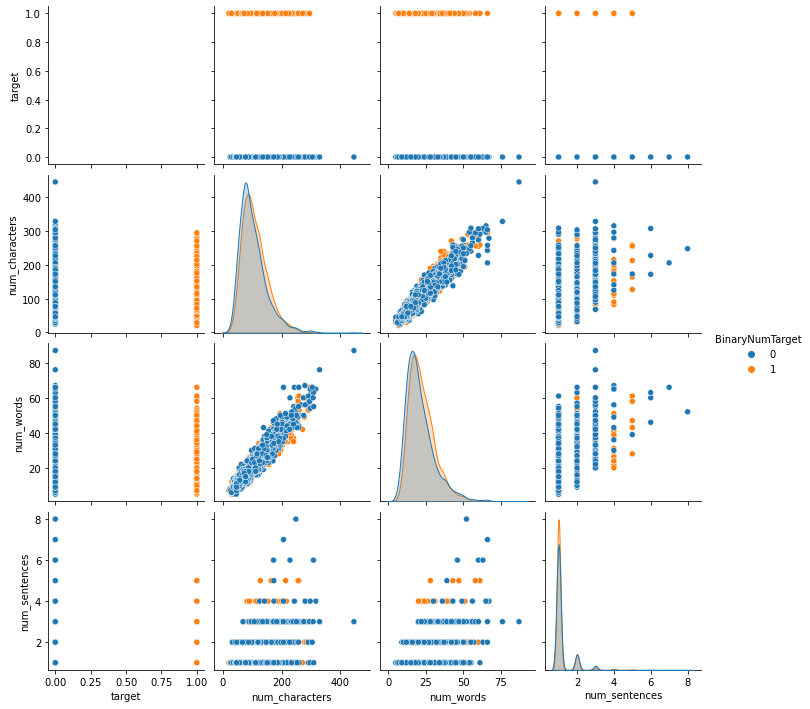

In [27]:
sns.pairplot(df,hue='BinaryNumTarget')

<AxesSubplot:>

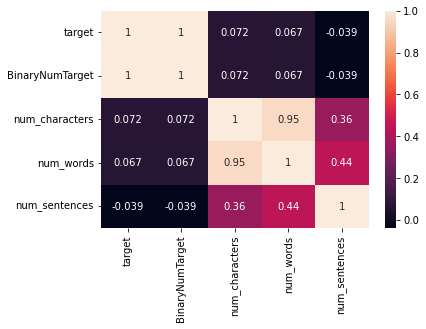

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
from nltk.corpus import stopwords

## 3. Data Preprocessing
*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming
*   New section







In [30]:
 def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [31]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [32]:
from nltk import corpus
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [35]:
transform_text('hi how are you %% laxmi?')

'hi laxmi'

In [36]:
df['statement'][2456]

'“Dr. Ugur Sahin, CEO of BioNTech and inventor of the BIO N TECH Pfizer jab, refuses to take the jab for safety reasons.”'

In [37]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [38]:

df['statement'][10]

'End of eviction moratorium means “millions of Americans” could lose their housing in the middle of a pandemic.'

In [39]:
df['transformed_statement'] = df['statement'].apply(transform_text)

In [40]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget,num_characters,num_words,num_sentences,transformed_statement
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1,85,17,1,new york lead nation lowest imprison rate larg...
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1,56,12,1,iowa rank 45th internet connect
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1,55,13,1,fun fact west virginia home zero billionair
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1,221,35,1,say gubernatori candid rebecca kleefisch work ...
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1,126,27,1,biden administr publish studi conclud 4 5 new ...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
fake_wc = wc.generate(df[df['BinaryNumTarget'] == 0]['transformed_statement'].str.cat(sep=" "))

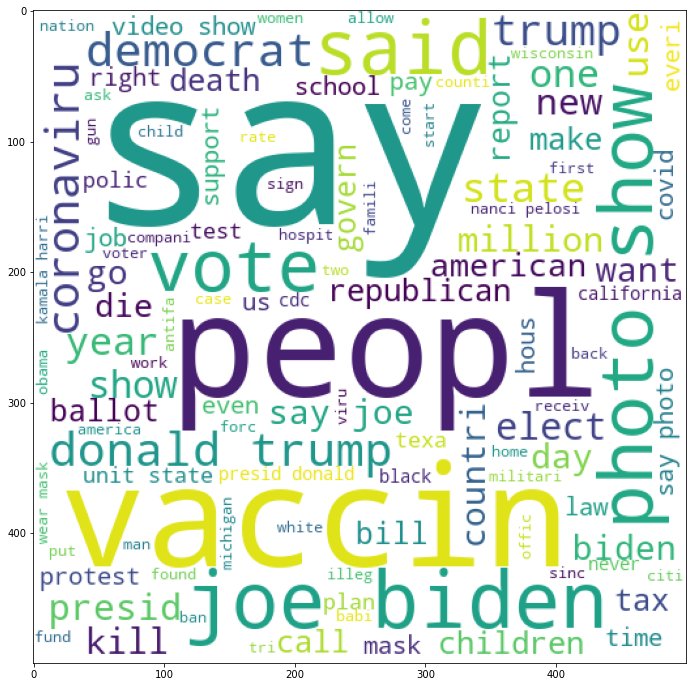

In [43]:
plt.figure(figsize=(24,12))
plt.imshow(fake_wc)

In [44]:
real_wc = wc.generate(df[df['BinaryNumTarget'] == 1]['transformed_statement'].str.cat(sep=" "))

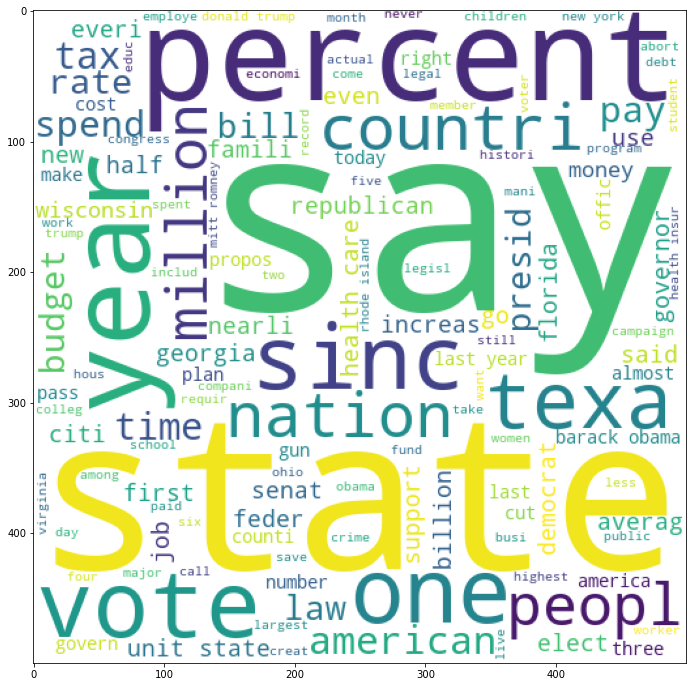

In [45]:
plt.figure(figsize=(24,12))
plt.imshow(real_wc)

In [46]:
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget,num_characters,num_words,num_sentences,transformed_statement
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1,85,17,1,new york lead nation lowest imprison rate larg...
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1,56,12,1,iowa rank 45th internet connect
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1,55,13,1,fun fact west virginia home zero billionair
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1,221,35,1,say gubernatori candid rebecca kleefisch work ...
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1,126,27,1,biden administr publish studi conclud 4 5 new ...


In [47]:
fake_corpus = []
for news in df[df['BinaryNumTarget'] == 0]['transformed_statement'].tolist():
    for word in news.split():
        fake_corpus.append(word)        

In [48]:

len(fake_corpus)

24416

C:\Users\saura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


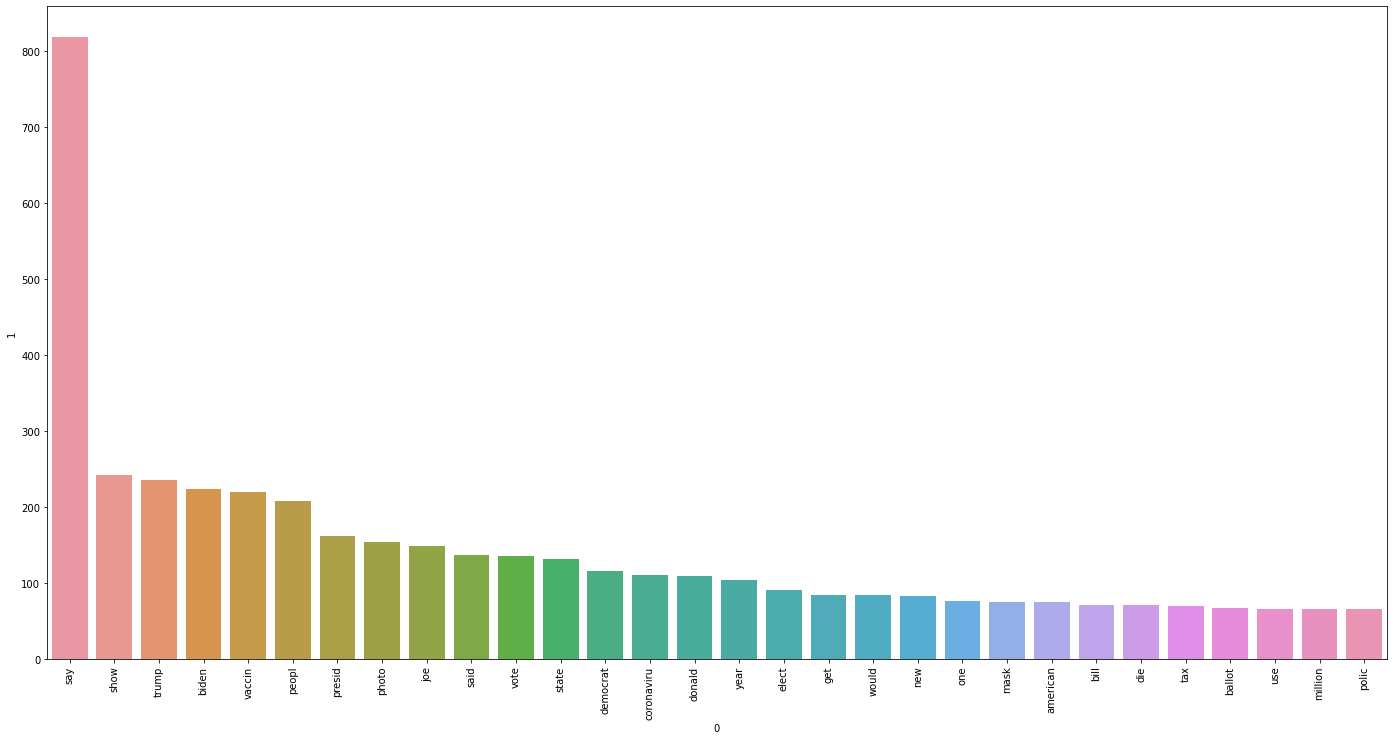

In [49]:
from collections import Counter
plt.figure(figsize=(24,12))
sns.barplot(pd.DataFrame(Counter(fake_corpus).most_common(30))[0],pd.DataFrame(Counter(fake_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
real_corpus = []
for news in df[df['BinaryNumTarget'] == 1]['transformed_statement'].tolist():
    for word in news.split():
        real_corpus.append(word)


In [51]:
len(real_corpus)

25255

C:\Users\saura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


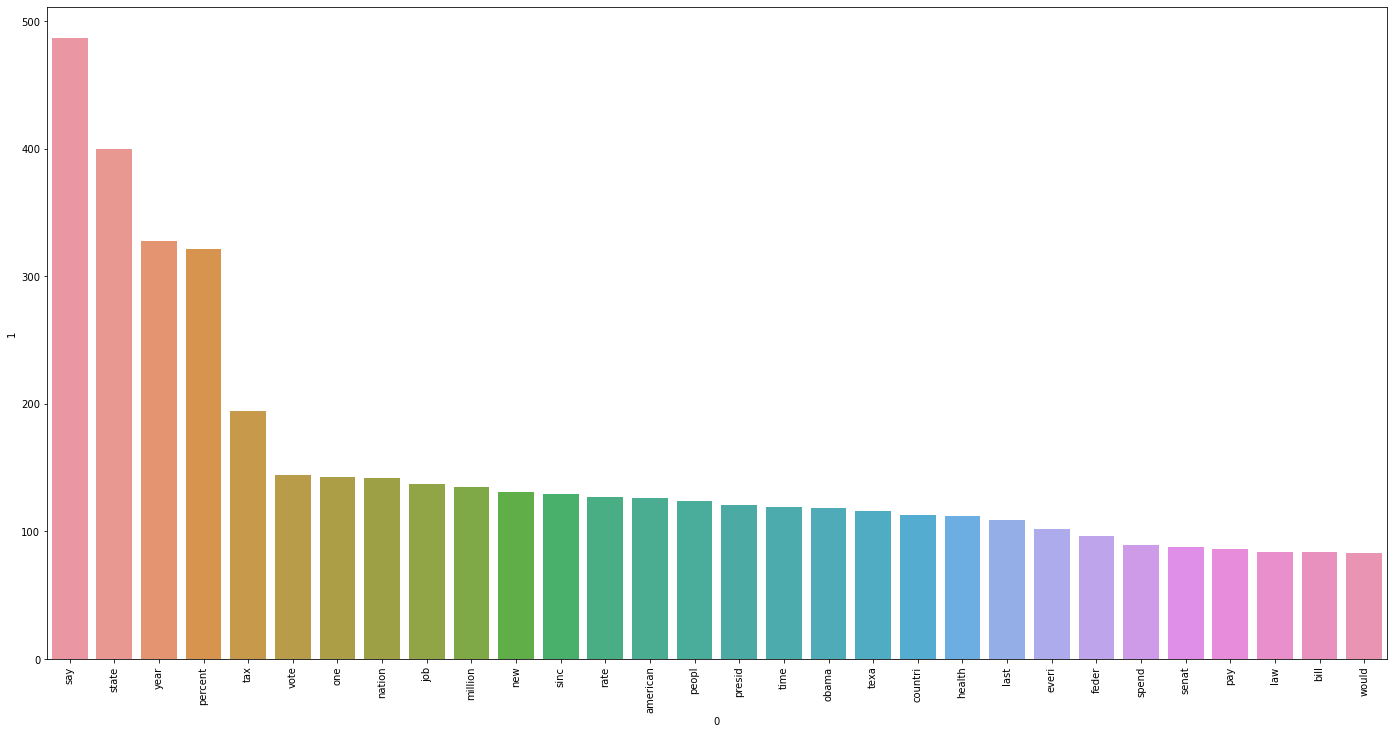

In [52]:
from collections import Counter
plt.figure(figsize=(24,12))
sns.barplot(pd.DataFrame(Counter(real_corpus).most_common(30))[0],pd.DataFrame(Counter(real_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
# Text Vectorization
# using Bag of Words
df.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget,num_characters,num_words,num_sentences,transformed_statement
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1,85,17,1,new york lead nation lowest imprison rate larg...
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1,56,12,1,iowa rank 45th internet connect
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1,55,13,1,fun fact west virginia home zero billionair
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1,221,35,1,say gubernatori candid rebecca kleefisch work ...
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1,126,27,1,biden administr publish studi conclud 4 5 new ...


## 4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(df['transformed_statement']).toarray()

In [56]:
X.shape

(4868, 3000)

In [57]:
y = df['BinaryNumTarget'].values

In [58]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [61]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8110106820049302
[[451 137]
 [ 93 536]]
0.7964338781575037


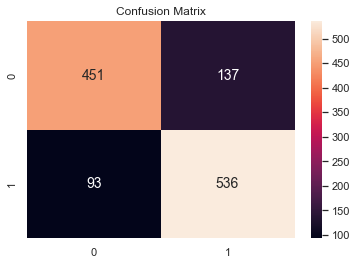


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       588
           1       0.80      0.85      0.82       629

    accuracy                           0.81      1217
   macro avg       0.81      0.81      0.81      1217
weighted avg       0.81      0.81      0.81      1217



In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sn
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# # Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))

In [65]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm=confusion_matrix(y_test,y_pred,normalize='all')
#cmd=ConfusionMatrixDisplay(cm, display_labels=['real','fake'])
#cmd.plot()
# print(cm)

In [66]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8142974527526705
[[469 119]
 [107 522]]
0.8143525741029641


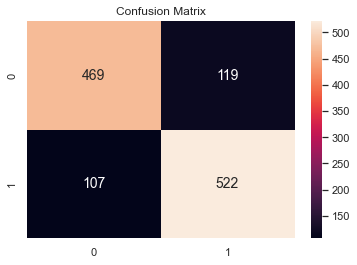


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       588
           1       0.81      0.83      0.82       629

    accuracy                           0.81      1217
   macro avg       0.81      0.81      0.81      1217
weighted avg       0.81      0.81      0.81      1217



In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sn
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred2, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()
# # Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred2 > 0.5)))

In [68]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm2=confusion_matrix(y_test,y_pred2,normalize='all')
#cmd2=ConfusionMatrixDisplay(cm2, display_labels=['real','fake'])
#cmd2.plot()

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bnb = BernoulliNB()

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc,
    'BNB':bnb  
    
    
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=9)
plt.ylim(0.5,0.85)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))